In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) + np.exp(- x[0] - 0.1)

def df(x):
    dfx1 = np.exp(x[0] + 3 * x[1] - 0.1) +np.exp(x[0] - 3 * x[1] - 0.1) - np.exp(- x[0] - 0.1)
    dfx2 = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] -0.1)
    return  np.array([dfx1, dfx2]) 

t = 1
count = 1
x0 = np.array([-1.3,1.3])
dx0 = np.array([.1, 0.05])  #arbitrary descent direction 
alpha = 0.1
beta = 0.7
precision = 0.00001  # Desired precision of result
max_iters = 10000  # Maximum number of iterations

def backtrack(x0, df, t, alpha, beta, count):
    
    while (np.any(f(x0 + t * dx0) > f(x0) + alpha*t*df(x0)*dx0.T)):
        t *= beta
        
        count += 1
    return t

t = backtrack(x0, df, t, alpha, beta,count)

print("\nfinal step size :",  t)


final step size : 1.9244817692775262e-15


In [10]:
def gradient(f,df, eps=1e-12,max_iter=1e4):
     
        x_pre=x_cur=theta=x0
        g=df(x_cur)
        
       
        k=0
        while k<max_iter :
            d=-g
            step = backtrack(x0, df, t, alpha, beta,count)
            x_cur = x_pre - step * g
            
            if np.linalg.norm(df(x_cur))<=eps:
                break
            
            k+=1
            
        return x_cur

x_cur = gradient(f, df, eps = 1e-12, max_iter= 1e4)
print(x_cur)

[-1.3  1.3]


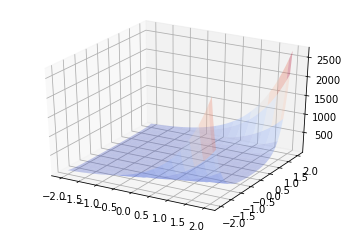

In [11]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,
                alpha=0.3, cmap=pt.cm.coolwarm, rstride=3, cstride=3)

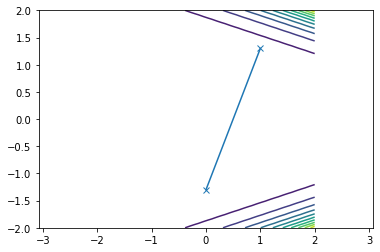

In [12]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 10)

plt.plot(x_cur, "x-")

Even after several thousand iterations, the minimum is not found or it may take more iteration than mine to find it.Trying different initial values leads to vastly different results, many of which are not close to the global minimum, and in many cases leading to infinite values (i.e. algorithm does not converge)